# Community Detection

A community is a group of people who are homegeneous in some features. 

Community detection deals with identifying networks based only on the network topology. Nodes in the communities are closer than the nodes outside the community. Closeness can be defined by 

1. defining distance metrics based on network topology
2. quantifying nodes in a community are closer with each other than nodes outside the community


References
- https://paperswithcode.com/task/community-detection#:~:text=Community%20Detection%20is%20one%20of,Large%2DScale%20Stochastic%20Block%20Models

## Girwan-Newman Algorithm

The most popular algorithm for network community detection is Girwan-Newman algorithm. We take the whole network and try to break it into two communities.

Steps
1. Define betweenness measure for each edge
2. Find the edge with the maximum betweenness and remove it
3. Recalculate and repeat

The example below uses data from the `Zachary Karate Club`. It contains 34 members, and after an internal conflict, the club split into two. Our goal is to find out how they split based on community.

In [1]:
import networkx as nx

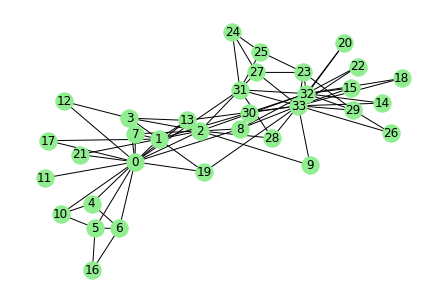

In [2]:
G = nx.karate_club_graph()
nx.draw_spring(G, with_labels=True, node_color="lightgreen")

In [3]:
# Calculating the betweenness centrality
btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(G)

# Sorting based on the betweenness centrality and displaying the first 10 edges.
sorted(btw_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.05938233879410351),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837)]

In [4]:
def girwan_newman(G, no_of_components_to_split):
    while (
        no_of_components_to_split
        > nx.algorithms.components.number_connected_components(G)
    ):
        # Calculate the betweenness centrality
        btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(G)

        # Sort based on betweenness centrality
        sorted_edges = sorted(
            btw_centrality.items(), key=lambda item: item[1], reverse=True
        )[0]
        print("Removing the edge", sorted_edges)

        # Remove edge which has highest centrality
        G.remove_edge(*sorted_edges[0])

    # Check if graph is split.
    if (
        no_of_components_to_split
        <= nx.algorithms.components.number_connected_components(G)
    ):
        # Plot the graph with both the nodes having different colors
        nx.draw_spring(G, with_labels=True)

        # Return the list of nodes in each community.
        list_of_nodes = [
            c for c in sorted(nx.connected_components(G), key=len, reverse=True)
        ]
        return list_of_nodes

Removing the edge ((0, 31), 0.1272599949070537)
Removing the edge ((0, 2), 0.11924273983097515)
Removing the edge ((0, 8), 0.13782067605597018)
Removing the edge ((13, 33), 0.14617273782105492)
Removing the edge ((19, 33), 0.21966651886437982)
Removing the edge ((2, 32), 0.1786195286195287)
Removing the edge ((1, 30), 0.25601957954899124)
Removing the edge ((1, 2), 0.1947415329768271)
Removing the edge ((2, 3), 0.19191919191919182)
Removing the edge ((2, 7), 0.25445632798573975)
Removing the edge ((2, 13), 0.5080213903743315)


[{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}]

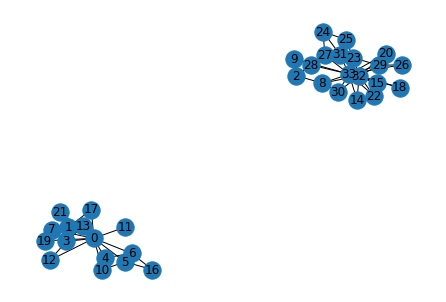

In [5]:
G = nx.karate_club_graph()
communities = girwan_newman(G, 2)
communities

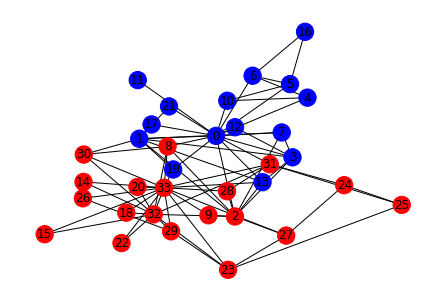

In [6]:
G = nx.karate_club_graph()

# Color for edges
color_for_edges = "rbgoy"
pos = nx.kamada_kawai_layout(G)
for i, nodes in enumerate(communities):
    for node in nodes:
        G.add_node(node, node_color=color_for_edges[i])
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=list(nx.get_node_attributes(G, "node_color").values()),
)

NetworkX has inbuilt function to calculate the same split

In [7]:
G = nx.karate_club_graph()

karate_club_split = nx.algorithms.community.centrality.girvan_newman(G)
karate_club_split_tuple = tuple(sorted(c) for c in next(karate_club_split))
karate_club_split_tuple

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

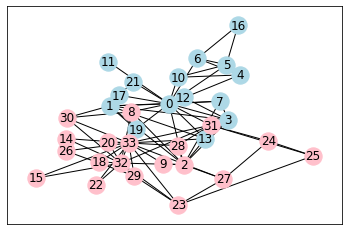

In [8]:
colors = ["lightblue", "pink"]
pos = nx.kamada_kawai_layout(G)

for i, nodes in enumerate(karate_club_split_tuple):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=colors[i])

nx.draw_networkx_edges(G, pos=pos)
_ = nx.draw_networkx_labels(G, pos=pos)

## Ratio Cut Method

A more complex and advanced method is the ratio cut method. A cut in a graph is a set of edges, such that if we remove them, the network breaks up into two components. 

The procedure is as follow:
1. Find the **minimum cut** among all the pair of nodes
2. Repeat over each of the two parts cut

In [9]:
from networkx.algorithms import community

communities = community.kernighan_lin_bisection(G, max_iter=100)
communities

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

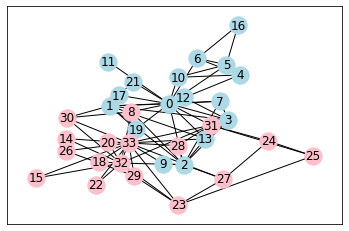

In [10]:
pos = nx.kamada_kawai_layout(G)

colors = ["lightblue", "pink"]
for i in range(len(communities)):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=communities[i], node_color=colors[i])
_ = nx.draw_networkx_labels(G, pos)
_ = nx.draw_networkx_edges(G, pos)

## Other methods



In [16]:
# How many ideal nodes: Louvain pakcage

communities = community.louvain_communities(G)
communities

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
 {4, 5, 6, 10, 16},
 {23, 24, 25, 27, 28, 31},
 {8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33}]

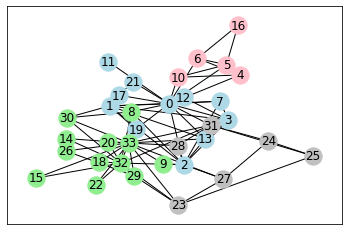

In [19]:
pos = nx.kamada_kawai_layout(G)

colors = ["lightblue", "pink", "silver", "lightgreen"]
for i in range(len(communities)):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=communities[i], node_color=colors[i])
_ = nx.draw_networkx_labels(G, pos)
_ = nx.draw_networkx_edges(G, pos)